In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from simpledbf import Dbf5
import os
import requests
import zipfile
import shutil
import re
import time

In [58]:
dirs = [file for file in os.listdir() if os.path.isdir(file)]

gisRegex= '(n\d+w\d+)'

for d in dirs:
    for root, dirs, files in os.walk(d):
        print(root)
        print(dirs)
        print(files)
        print()
        for f in files:
            if f.endswith(".dbf"):
                print('FOUND')
                print(os.path.join(os.getcwd(),root, f))
                print(os.path.join(os.getcwd(),f))
                shutil.copyfile(os.path.join(os.getcwd(),root, f),
                        os.path.join(os.getcwd(),f))
                
                print()
    break
'''
folderErrors = []
copyErrors = []
for d in dirs:
    print('extracting dbf files from subfolder', d)
    subDir = os.path.join(os.getcwd(),d)
    dbfs = [file for file in os.listdir(subDir) if file.endswith(".dbf")]
    if not dbfs: folderErrors.append(d)
    for dbf in dbfs:
        shutil.copyfile(os.path.join(subDir,dbf),
                        os.path.join(os.getcwd(),dbf))
    print('removing directory')
    shutil.rmtree(os.path.join(os.getcwd(),d))
    
'''
    

USGS_NED_13_n49w094_ArcGrid
['n49w094', 'New folder', 'grdn49w094_13', 'info']
['USGS_NED_13_n49w094_ArcGrid_thumb.jpg', 'grdn49w094_13.aux.xml', 'Thumbs.db', 'readme.pdf', 'SpatialMetadata.url', 'NED_DataDictionary.url', 'USGS_NED_13_n49w094_ArcGrid_meta.xml', 'USGS_NED_13_n49w094_ArcGrid_meta.html', 'USGS_NED_13_n49w094_ArcGrid_meta.txt']

USGS_NED_13_n49w094_ArcGrid/n49w094
[]
['n49w094.prj', 'n49w094.shx', 'n49w094.dbf', 'n49w094.shp', 'n49w094.cpg']

FOUND
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n49w094_ArcGrid/n49w094/n49w094.dbf
/home/riggs/Documents/DND/GIS data/n49w094.dbf

USGS_NED_13_n49w094_ArcGrid/New folder
[]
[]

USGS_NED_13_n49w094_ArcGrid/grdn49w094_13
[]
['sta.adf', 'hdr.adf', 'prj.adf', 'w001001.adf', 'w001001x.adf', 'dblbnd.adf']

USGS_NED_13_n49w094_ArcGrid/info
[]
['arc0001.nit', 'arc0001.dat', 'arc.dir', 'arc0000.dat', 'arc0000.nit']



'\nfolderErrors = []\ncopyErrors = []\nfor d in dirs:\n    print(\'extracting dbf files from subfolder\', d)\n    subDir = os.path.join(os.getcwd(),d)\n    dbfs = [file for file in os.listdir(subDir) if file.endswith(".dbf")]\n    if not dbfs: folderErrors.append(d)\n    for dbf in dbfs:\n        shutil.copyfile(os.path.join(subDir,dbf),\n                        os.path.join(os.getcwd(),dbf))\n    print(\'removing directory\')\n    shutil.rmtree(os.path.join(os.getcwd(),d))\n    \n'

In [28]:
dirs = [file for file in os.listdir() if file.endswith(".zip")]
for d in dirs:
    print('extracting zip')
    zipInfo = os.stat(os.path.join(d))
    print(d)
    try:
        zip_ref = zipfile.ZipFile(os.path.join(d), 'r')
        folder = d.split('.')[0]
        zip_ref.extractall(os.path.join(folder))
        zip_ref.close()
        print('removing zip file')
        os.remove(os.path.join(d))

        print('extracting dbf files from subfolder', folder)
        subDir = os.path.join(os.getcwd(),folder)
        dbfs = [file for file in os.listdir(subDir) if file.endswith(".dbf")]
        if not dbfs: folderErrors.append(folder)
        for dbf in dbfs:
            shutil.copyfile(os.path.join(subDir,dbf),
                            os.path.join(os.getcwd(),dbf))
        print('removing directory')
        shutil.rmtree(os.path.join(os.getcwd(),folder))
    except:
        print('error')


extracting zip
n49w097.zip
error
extracting zip
n47w098.zip
error
extracting zip
n38w122.zip
error
extracting zip
n30w082.zip
error
extracting zip
n32w083.zip
error
extracting zip
n45w088.zip
error
extracting zip
n38w112.zip
error
extracting zip
n33w102.zip
error
extracting zip
n35w076.zip
error
extracting zip
n48w118.zip
error
extracting zip
n49w109.zip
error
extracting zip
n48w110.zip
error
extracting zip
n43w092.zip
error
extracting zip
n34w108.zip
error
extracting zip
n37w112.zip
error
extracting zip
n45w116.zip
error
extracting zip
n28w097.zip
error
extracting zip
n47w109.zip
error
extracting zip
n37w120.zip
error
extracting zip
n44w081.zip
error
extracting zip
n39w092.zip
error
extracting zip
n42w081.zip
error
extracting zip
n35w120.zip
error
extracting zip
n36w113.zip
error
extracting zip
n41w079.zip
error
extracting zip
n38w121.zip
error
extracting zip
n39w084.zip
error
extracting zip
n39w105.zip
error
extracting zip
n41w121.zip
error
extracting zip
n36w110.zip
error
extracting

In [65]:
sourceLinks = 'ned989_20180623_195725.txt'
with open(sourceLinks,'r') as f:
    print(len(f.readlines()))

990


In [66]:
#log template: 'latlong','Full url','Request','Download Zip','extracting Zip',
#                             'remove zip','extract dbf','folder removed'

#Download Zips from source links, extract zips, copy out dbf files
382559c38f9957de1a84225e0dba964f

sourceLinks = 'ned989_20180623_195725.txt'
#Source link from https://viewer.nationalmap.gov/basic/#productSearch using:
# Elevation Products (3DEP): 1/3 arc-second DEM product

#dirs = [file for file in os.listdir() if file.endswith(".zip")]
gisRegex= '(n\d+w\d+)'

latlong = [re.findall(gisRegex,x)[0] for x in os.listdir() if re.findall(gisRegex,x)]

#fix log so empty fields exist after an error occurs "error,,,,,"
#make sure not to get 'ned_13arcsec_g.dbf'

i = 0
threshold = 1000
with open('log.txt','w') as log:
    log.write('latlong,Full url,Request,Download Zip,extracting Zip,remove zip,extract dbf,folder removed\n')
    with open(sourceLinks,'r') as f:
        t = time.time()
        for line in f.readlines():
            url = line.strip('\n')
            print(url)
            urlLatLong = re.findall(gisRegex,url)[0]
            print('Regex',urlLatLong)
            log.write(str(urlLatLong)+',')
            log.write(str(url)+',')
            try:
                if urlLatLong not in latlong: #checks to see if we have it already
                    print('Looking for url')
                    r = requests.get(url)
                    if r.status_code ==200: #checks if it's a good link
                        print('Link found')
                        log.write(str(time.time()-t)+',')
                        t = time.time()
                        fileName = url.split('/')[-1]
                        
                        print('writing Zip')
                        with open(fileName, 'wb') as f: #downloads Zip file
                            f.write(r.content)
                        log.write(str(time.time()-t)+',')
                        t = time.time()
                        try:
                            print('extracting zip')
                            log.write(str(time.time()-t)+',')
                            t = time.time()
                            zip_ref = zipfile.ZipFile(os.path.join(fileName), 'r')
                            folder = fileName.split('.')[0]
                            zip_ref.extractall(os.path.join(folder))
                            zip_ref.close()

                            print('removing zip file')
                            os.remove(os.path.join(fileName))
                            log.write(str(time.time()-t)+',')
                            t = time.time()

                            try:
                                print('Searching for dbf files in subfolders of',folder)
                                for root, dirs, files in os.walk(folder):
                                    for file in files:
                                        if file.endswith(".dbf"):
                                            print('Found dbf. Copying')
                                            print(os.path.join(os.getcwd(),root, file))
                                            print(os.path.join(os.getcwd(),file))
                                            shutil.copyfile(os.path.join(os.getcwd(),root, file),
                                                    os.path.join(os.getcwd(),file))
                                            log.write(str(time.time()-t)+',')
                                            t = time.time()

                                print('removing directory')
                                shutil.rmtree(os.path.join(os.getcwd(),folder))
                                log.write(str(time.time()-t)+',')
                                t = time.time()
                            except:
                                log.write('Error,')
                                log.write('Error,')

                        except:
                            log.write('Error')
                            log.write('Error')
                    else:
                        log.write('Error')
                else:
                    print('Already Exists')
                    log.write('Already Exists')
            except:
                log.write('Error')
            log.write('\n')
            log.flush()
            if i == threshold: break
            i+=1



https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n48w092_ArcGrid.zip
Regex n48w092
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n45w096_ArcGrid.zip
Regex n45w096
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n32w106_ArcGrid.zip
Regex n32w106
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n37w101_ArcGrid.zip
Regex n37w101
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n41w106_ArcGrid.zip
Regex n41w106
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n45w097_ArcGrid.zip
Regex n45w097
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n45w122.zip
Regex n45w122
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n41w105_ArcGrid.zip
Regex n41

Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n30w099
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n30w099/n30w099_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n30w099_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n30w099/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n35w079.zip
Regex n35w079
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n35w079
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n35w079/n35w079_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n35w079_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n35w079/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n37w079.zip
Regex n37w079
Lo

Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n37w111/n37w111_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n37w111_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n37w112.zip
Regex n37w112
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n38w112.zip
Regex n38w112
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n38w121.zip
Regex n38w121
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n39w105.zip
Regex n39w105
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n39w107.zip
Regex n39w107
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n40w125.zip
Regex n40w125
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n40w125
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n40w125/n40w125_13_meta.

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n47w109.zip
Regex n47w109
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n47w113.zip
Regex n47w113
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n47w113
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n47w113/n47w113_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n47w113_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n47w113/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n49w125.zip
Regex n49w125
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n34w108.zip
Regex n34w108
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n35w120.zip
Regex n35w120
Already Exists
https://prd-tnm.s3.amazonaws.com/StagedProducts/Eleva

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n37w123.zip
Regex n37w123
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n37w123
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n37w123/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n37w123/n37w123_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n37w123_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n38w110.zip
Regex n38w110
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n38w110
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n38w110/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n38w110/n38w110_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n38w110_13_meta.dbf
remov

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n34w112.zip
Regex n34w112
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n34w112
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n34w112/n34w112_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n34w112_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n34w112/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n34w119.zip
Regex n34w119
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n34w119
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n34w119/n34w119_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n34w119_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n34w119/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
remov

Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n32w102
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n32w102/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n32w102/n32w102_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n32w102_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n32w103.zip
Regex n32w103
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n32w103
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n32w103/n32w103_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n32w103_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n32w103/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n34w107.zip
Regex n34w107
Lo

Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n46w106/n46w106_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n46w106_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n49w113.zip
Regex n49w113
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n49w113
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n49w113/n49w113_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n49w113_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n49w113/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n31w106.zip
Regex n31w106
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n31w106
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n31w106/n31w106_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n31w

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n45w115.zip
Regex n45w115
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n45w115
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n45w115/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n45w115/n45w115_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n45w115_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n46w120.zip
Regex n46w120
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n46w120
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n46w120/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n46w120/n46w120_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n46w120_13_meta.dbf
remov

Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n46w102
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n46w102/n46w102_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n46w102_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n46w102/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n47w102.zip
Regex n47w102
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n47w102
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n47w102/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n47w102/n47w102_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n47w102_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n47w110.zip
Regex n47w110
Lo

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n42w121.zip
Regex n42w121
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n42w121
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n42w121/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n42w121/n42w121_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n42w121_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n42w123.zip
Regex n42w123
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n42w123
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n42w123/n42w123_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n42w123_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n42w123/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
remov

Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n40w118
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n40w118/n40w118_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n40w118_13_meta.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n40w118/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n41w109.zip
Regex n41w109
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n41w109
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n41w109/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n41w109/n41w109_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n41w109_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n42w110.zip
Regex n42w110
Lo

Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n32w114/n32w114_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n32w114_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n34w114.zip
Regex n34w114
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n34w114
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n34w114/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n34w114/n34w114_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n34w114_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n35w110.zip
Regex n35w110
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n35w110
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n35w110/n35w110_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n35w

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n49w102.zip
Regex n49w102
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n49w102
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n49w102/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n49w102/n49w102_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n49w102_13_meta.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/n50w124.zip
Regex n50w124
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of n50w124
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n50w124/ned_13arcsec_g.dbf
/home/riggs/Documents/DND/GIS data/ned_13arcsec_g.dbf
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/n50w124/n50w124_13_meta.dbf
/home/riggs/Documents/DND/GIS data/n50w124_13_meta.dbf
remov

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n30w093_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n30w093_ArcGrid/n30w093/n30w093.dbf
/home/riggs/Documents/DND/GIS data/n30w093.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n30w089_ArcGrid.zip
Regex n30w089
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n30w089_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n30w089_ArcGrid/n30w089/n30w089.dbf
/home/riggs/Documents/DND/GIS data/n30w089.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n35w078_ArcGrid.zip
Regex n35w078
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n35w078_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n46w074_ArcGrid.zip
Regex n46w074
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n46w074_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n46w074_ArcGrid/n46w074/n46w074.dbf
/home/riggs/Documents/DND/GIS data/n46w074.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n49w115_ArcGrid.zip
Regex n49w115
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n49w115_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n49w115_ArcGrid/n49w115/n49w115.dbf
/home/riggs/Documents/DND/GIS data/n49w115.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n49w124_ArcGrid.zip
Regex n49w124
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n48w120_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n48w120_ArcGrid/n48w120/n48w120.dbf
/home/riggs/Documents/DND/GIS data/n48w120.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n40w110_ArcGrid.zip
Regex n40w110
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n40w110_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n40w110_ArcGrid/n40w110/n40w110.dbf
/home/riggs/Documents/DND/GIS data/n40w110.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n46w119_ArcGrid.zip
Regex n46w119
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n46w119_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

Searching for dbf files in subfolders of USGS_NED_13_n36w101_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n36w101_ArcGrid/n36w101/n36w101.dbf
/home/riggs/Documents/DND/GIS data/n36w101.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n33w101_ArcGrid.zip
Regex n33w101
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n33w101_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n33w101_ArcGrid/n33w101/n33w101.dbf
/home/riggs/Documents/DND/GIS data/n33w101.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n43w101_ArcGrid.zip
Regex n43w101
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n43w101_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n43w101_ArcGrid/n

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n33w090_ArcGrid.zip
Regex n33w090
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n33w090_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n33w090_ArcGrid/n33w090/n33w090.dbf
/home/riggs/Documents/DND/GIS data/n33w090.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n45w090_ArcGrid.zip
Regex n45w090
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n45w090_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n45w090_ArcGrid/n45w090/n45w090.dbf
/home/riggs/Documents/DND/GIS data/n45w090.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n45w069_ArcGrid.zip
Regex n45w069
Looking for url
Link found
writing Zi

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n33w099_ArcGrid.zip
Regex n33w099
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n33w099_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n33w099_ArcGrid/n33w099/n33w099.dbf
/home/riggs/Documents/DND/GIS data/n33w099.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n40w093_ArcGrid.zip
Regex n40w093
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n40w093_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n40w093_ArcGrid/n40w093/n40w093.dbf
/home/riggs/Documents/DND/GIS data/n40w093.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n45w075_ArcGrid.zip
Regex n45w075
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n45w076_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n45w076_ArcGrid/n45w076/n45w076.dbf
/home/riggs/Documents/DND/GIS data/n45w076.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n39w099_ArcGrid.zip
Regex n39w099
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n39w099_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n39w099_ArcGrid/n39w099/n39w099.dbf
/home/riggs/Documents/DND/GIS data/n39w099.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n45w085_ArcGrid.zip
Regex n45w085
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n45w085_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n37w088_ArcGrid.zip
Regex n37w088
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n37w088_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n37w088_ArcGrid/n37w088/n37w088.dbf
/home/riggs/Documents/DND/GIS data/n37w088.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n41w093_ArcGrid.zip
Regex n41w093
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n41w093_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n41w093_ArcGrid/n41w093/n41w093.dbf
/home/riggs/Documents/DND/GIS data/n41w093.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n43w098_ArcGrid.zip
Regex n43w098
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n39w095_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n39w095_ArcGrid/n39w095/n39w095.dbf
/home/riggs/Documents/DND/GIS data/n39w095.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n45w073_ArcGrid.zip
Regex n45w073
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n45w073_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n45w073_ArcGrid/n45w073/n45w073.dbf
/home/riggs/Documents/DND/GIS data/n45w073.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n33w095_ArcGrid.zip
Regex n33w095
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n33w095_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

Searching for dbf files in subfolders of USGS_NED_13_n39w087_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n39w087_ArcGrid/n39w087/n39w087.dbf
/home/riggs/Documents/DND/GIS data/n39w087.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n40w094_ArcGrid.zip
Regex n40w094
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n40w094_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n40w094_ArcGrid/n40w094/n40w094.dbf
/home/riggs/Documents/DND/GIS data/n40w094.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n47w094_ArcGrid.zip
Regex n47w094
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n47w094_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n47w094_ArcGrid/n

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n40w086_ArcGrid.zip
Regex n40w086
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n40w086_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n40w086_ArcGrid/n40w086/n40w086.dbf
/home/riggs/Documents/DND/GIS data/n40w086.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n47w085_ArcGrid.zip
Regex n47w085
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n47w085_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n47w085_ArcGrid/n47w085/n47w085.dbf
/home/riggs/Documents/DND/GIS data/n47w085.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n40w085_ArcGrid.zip
Regex n40w085
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n19w066_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n19w066_ArcGrid/n19w066/n19w066.dbf
/home/riggs/Documents/DND/GIS data/n19w066.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n19w068_ArcGrid.zip
Regex n19w068
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n19w068_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n19w068_ArcGrid/n19w068/n19w068.dbf
/home/riggs/Documents/DND/GIS data/n19w068.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n31w086_ArcGrid.zip
Regex n31w086
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n31w086_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n34w081_ArcGrid.zip
Regex n34w081
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n34w081_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n34w081_ArcGrid/n34w081/n34w081.dbf
/home/riggs/Documents/DND/GIS data/n34w081.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n37w085_ArcGrid.zip
Regex n37w085
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n37w085_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n37w085_ArcGrid/n37w085/n37w085.dbf
/home/riggs/Documents/DND/GIS data/n37w085.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n34w090_ArcGrid.zip
Regex n34w090
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n44w085_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n44w085_ArcGrid/n44w085/n44w085.dbf
/home/riggs/Documents/DND/GIS data/n44w085.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n35w098_ArcGrid.zip
Regex n35w098
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n35w098_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n35w098_ArcGrid/n35w098/n35w098.dbf
/home/riggs/Documents/DND/GIS data/n35w098.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n35w099_ArcGrid.zip
Regex n35w099
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n35w099_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n41w076_ArcGrid.zip
Regex n41w076
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n41w076_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n41w076_ArcGrid/USGS_NED_13_n41w076_ArcGrid/n41w076/n41w076.dbf
/home/riggs/Documents/DND/GIS data/n41w076.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n37w076_ArcGrid.zip
Regex n37w076
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n37w076_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n37w076_ArcGrid/n37w076/n37w076.dbf
/home/riggs/Documents/DND/GIS data/n37w076.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n44w096_ArcGrid.zip
Regex n44w096
Looking f

Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n39w091_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n39w091_ArcGrid/n39w091/n39w091.dbf
/home/riggs/Documents/DND/GIS data/n39w091.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n31w092_ArcGrid.zip
Regex n31w092
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n31w092_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n31w092_ArcGrid/n31w092/n31w092.dbf
/home/riggs/Documents/DND/GIS data/n31w092.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n32w091_ArcGrid.zip
Regex n32w091
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n32w091_ArcGrid
Found dbf. Copying
/home/ri

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n44w091_ArcGrid.zip
Regex n44w091
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n44w091_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n44w091_ArcGrid/n44w091/n44w091.dbf
/home/riggs/Documents/DND/GIS data/n44w091.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n41w095_ArcGrid.zip
Regex n41w095
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n41w095_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n41w095_ArcGrid/n41w095/n41w095.dbf
/home/riggs/Documents/DND/GIS data/n41w095.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n35w091_ArcGrid.zip
Regex n35w091
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n38w080_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n38w080_ArcGrid/n38w080/n38w080.dbf
/home/riggs/Documents/DND/GIS data/n38w080.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n38w084_ArcGrid.zip
Regex n38w084
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n38w084_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n38w084_ArcGrid/n38w084/n38w084.dbf
/home/riggs/Documents/DND/GIS data/n38w084.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n48w100_ArcGrid.zip
Regex n48w100
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n48w100_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n33w116_ArcGrid.zip
Regex n33w116
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n33w116_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n33w116_ArcGrid/n33w116/n33w116.dbf
/home/riggs/Documents/DND/GIS data/n33w116.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n36w116_ArcGrid.zip
Regex n36w116
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n36w116_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n36w116_ArcGrid/n36w116/n36w116.dbf
/home/riggs/Documents/DND/GIS data/n36w116.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n36w107_ArcGrid.zip
Regex n36w107
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n55w132_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n55w132_ArcGrid/n55w132/n55w132.dbf
/home/riggs/Documents/DND/GIS data/n55w132.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n57w134_ArcGrid.zip
Regex n57w134
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n57w134_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n57w134_ArcGrid/n57w134/n57w134.dbf
/home/riggs/Documents/DND/GIS data/n57w134.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n58w134_ArcGrid.zip
Regex n58w134
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n58w134_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n42w103_ArcGrid.zip
Regex n42w103
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n42w103_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n42w103_ArcGrid/n42w103/n42w103.dbf
/home/riggs/Documents/DND/GIS data/n42w103.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n49w105_ArcGrid.zip
Regex n49w105
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n49w105_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n49w105_ArcGrid/n49w105/n49w105.dbf
/home/riggs/Documents/DND/GIS data/n49w105.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n39w114_ArcGrid.zip
Regex n39w114
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n44w107_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n44w107_ArcGrid/n44w107/n44w107.dbf
/home/riggs/Documents/DND/GIS data/n44w107.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n37w107_ArcGrid.zip
Regex n37w107
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n37w107_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n37w107_ArcGrid/n37w107/n37w107.dbf
/home/riggs/Documents/DND/GIS data/n37w107.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n35w107_ArcGrid.zip
Regex n35w107
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n35w107_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n40w109_ArcGrid.zip
Regex n40w109
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n40w109_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n40w109_ArcGrid/n40w109/n40w109.dbf
/home/riggs/Documents/DND/GIS data/n40w109.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n49w122_ArcGrid.zip
Regex n49w122
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n49w122_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n49w122_ArcGrid/n49w122/n49w122.dbf
/home/riggs/Documents/DND/GIS data/n49w122.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n47w122_ArcGrid.zip
Regex n47w122
Looking for url
Link found
writing Zi

removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n38w109_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n38w109_ArcGrid/n38w109/n38w109.dbf
/home/riggs/Documents/DND/GIS data/n38w109.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n38w113_ArcGrid.zip
Regex n38w113
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n38w113_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13_n38w113_ArcGrid/n38w113/n38w113.dbf
/home/riggs/Documents/DND/GIS data/n38w113.dbf
removing directory
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/ArcGrid/USGS_NED_13_n57w135_ArcGrid.zip
Regex n57w135
Looking for url
Link found
writing Zip
extracting zip
removing zip file
Searching for dbf files in subfolders of USGS_NED_13_n57w135_ArcGrid
Found dbf. Copying
/home/riggs/Documents/DND/GIS data/USGS_NED_13

IndexError: list index out of range

In [78]:
logDict = {}
with open('log.txt','r') as f:
    header = f.readline().strip('\n').split(',')
    hLen =len(header)
    for line in f.readlines():
        entry = line.strip('\n').split(',')
        while len(entry)<hLen:
            entry.append(np.nan)
        logDict[entry[0]]=dict(zip(header[1:],entry[1:]))

In [81]:
logDF = pd.DataFrame.from_dict(logDict, orient = 'index')
logDF.head()

,Full url,Request,Download Zip,extracting Zip,remove zip,extract dbf,folder removed
n18w065,https://prd-tnm.s3.amazonaws.com/StagedProduct...,Already Exists,NaN,NaN,NaN,NaN,NaN
n18w066,https://prd-tnm.s3.amazonaws.com/StagedProduct...,Already Exists,NaN,NaN,NaN,NaN,NaN
n18w067,https://prd-tnm.s3.amazonaws.com/StagedProduct...,7.448055028915405,0.009872674942016602,6.890296936035156e-05,1.4685840606689453,0.002021312713623047,1.6217150688171387
n18w068,https://prd-tnm.s3.amazonaws.com/StagedProduct...,4.348143100738525,0.004633188247680664,0.0004107952117919922,1.3639798164367676,0.0027322769165039062,1.389132022857666
n19w065,https://prd-tnm.s3.amazonaws.com/StagedProduct...,Already Exists,NaN,NaN,NaN,NaN,NaN


In [89]:
logDF = logDF[(logDF != 'Error') & (logDF != 'Already Exists')]

In [91]:
for c in logDF.columns:
    try:
        print(logDF[c].astype(float).describe())
    except:
        pass

count     662.000000
mean       88.795049
std        73.537955
min         2.077053
25%        67.371311
50%        82.006942
75%       100.869036
max      1501.908950
Name: Request, dtype: float64
count    662.000000
mean       0.304053
std        0.803285
min        0.002024
25%        0.158491
50%        0.176288
75%        0.188535
max        7.476817
Name: Download Zip, dtype: float64
count    662.000000
mean       0.000103
std        0.000067
min        0.000051
25%        0.000078
50%        0.000085
75%        0.000097
max        0.000549
Name: extracting Zip, dtype: float64
count    662.000000
mean       7.205882
std        2.106121
min        1.317253
25%        6.245976
50%        7.675581
75%        8.479843
max       27.634999
Name: remove zip, dtype: float64
count    662.000000
mean       0.061454
std        0.201158
min        0.001384
25%        0.003101
50%        0.004387
75%        0.005479
max        2.659520
Name: extract dbf, dtype: float64


In [151]:
dirs = [file for file in os.listdir() if file.endswith('.dbf')]
cols = []
for d in dirs:
    dbfDF = Dbf5(d).to_dataframe()
    for c in dbfDF.columns:
        if c not in cols: cols.append(c)

['AREA', 'PERIMETER', 'P00000M_', 'P00000M_ID', 'DEMNAME', 'UTMZONE', 'HDATUM', 'RESOLUTION', 'ZUNIT', 'ZSTEP', 'LRLAT', 'LRLON', 'ULLAT', 'ULLON', 'ZMIN', 'ZMAX', 'MEAN', 'SIGMA', 'PDEVICE', 'PMETHOD', 'PSITE', 'S_DATE', 'I_DATE', 'ABSX', 'ABSY', 'ABSZ', 'ABSPTS', 'RMSE', 'RMSEX', 'RMSEY', 'RMSEZ', 'RMSEPTS', 'FREETEXT', 'XSHIFT', 'YSHIFT', 'VDATUM', 'ZSHIFT', 'QUADDATE', 'QUADNAME', 'P00001M_', 'P00001M_ID', 'demname', 'quadname', 'psite', 'pmethod', 'pdevice', 'freetext', 'resolution', 'horizres_m', 's_date', 'i_date', 'hdatum', 'utmzone', 'xshift', 'yshift', 'lrlat', 'lrlon', 'ullat', 'ullon', 'vdatum', 'zunit', 'zstep', 'zshift', 'zmin', 'zmax', 'zmean', 'zsigma', 'absx', 'absy', 'absz', 'abspts', 'rmse', 'rmsex', 'rmsey', 'rmsez', 'rmsepts', 'quaddate', 'meta_p_are', 'meta_p_per', 'pts_id', 'va_unit']


In [153]:
dirs = [file for file in os.listdir() if file.endswith('.dbf')]

masterGIS = pd.DataFrame(columns = ['lrLat', 'lrLon', 'ulLat', 'ulLon','lat','lon','z','zsigma'])
for d in dirs:
    dbfDF = Dbf5(d).to_dataframe()
    tempDF = pd.DataFrame(columns = ['lrLat', 'lrLon', 'ulLat', 'ulLon','lat','lon','z','zsigma'])
    dbfDF.columns = [x.lower() for x in dbfDF.columns.tolist()]
    tempDF['lrLat'] = dbfDF['lrlat']
    tempDF['lrLon'] = dbfDF['lrlon']
    tempDF['ulLat'] = dbfDF['ullat']
    tempDF['ulLon'] = dbfDF['ullon']
    
    tempDF['lat'] = dbfDF[['lrlat','ullat']].mean(axis=1)
    tempDF['lon'] = -abs(dbfDF[['lrlon','ullon']].mean(axis=1))
    
    if 'mean' in dbfDF.columns: tempDF['z'] = dbfDF['mean']
    if 'zmean' in dbfDF.columns: tempDF['z'] = dbfDF['zmean']
    if 'sigma' in dbfDF.columns: tempDF['zsigma'] = dbfDF['sigma']
    if 'zsigma' in dbfDF.columns: tempDF['zsigma'] = dbfDF['zsigma']
    
    masterGIS = pd.concat([masterGIS,tempDF])
    
masterGIS.to_csv('Compiled US.csv')
masterGIS.head()


,lrLat,lrLon,ulLat,ulLon,lat,lon,z,zsigma
0,41.0,-124.000,41.125,-123.875,41.0625,-123.9375,449.301,167.079
1,41.0,-123.875,41.125,-123.750,41.0625,-123.8125,702.523,235.045
2,41.0,-123.750,41.125,-123.625,41.0625,-123.6875,461.427,263.822
3,41.0,-123.625,41.125,-123.500,41.0625,-123.5625,892.748,377.065
4,41.0,-123.500,41.125,-123.375,41.0625,-123.4375,1380.230,256.564


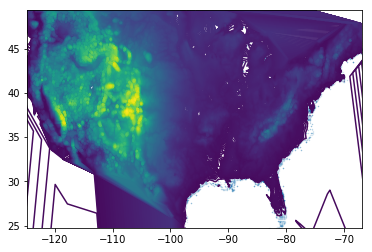

In [150]:
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

plt.tricontour(masterGIS['lon'],masterGIS['lat'],masterGIS['z'], 1000)
plt.scatter(masterGIS['lon'],masterGIS['lat'],  s=0.1, alpha = 0.2)
plt.xlim((left,right))
plt.ylim((bottom,top))
#plt.axis('equal')
plt.show()